
**Inteligencia Artificial y Aprendizaje Automático**

Actividad Semanas 3 y 4:

Modelado, Balanceo e Importancia de Factores

Maestría en Inteligencia Artificial Aplicada
Tecnológico de Monterrey
Prof. Luis Eduardo Falcón Morales

Nombre: Emmanuel Gonzalez Velazquez

Matrícula: A01364577

La rotación de personal es uno de los problemas que afecta actualmente a muchas empresas y
organizaciones, grandes o pequeñas y de cualquier tipo de negocio. En esta actividad usaremos
una base de datos generada por IBM para estudiar cómo enfrentar dicho problema. Deberás
descargar el archivo de la siguiente liga de Kaggle, la cual consta de 1470 registros y 35
columnas:

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [11]:
!ls


 anscombe.json		        mnist_test.csv	       'WA_Fn-UseC_-HR-Employee-Attrition (1).csv'
 california_housing_test.csv    mnist_train_small.csv   WA_Fn-UseC_-HR-Employee-Attrition.csv
 california_housing_train.csv   README.md


In [12]:
%cd sample_data/

!ls

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data
 anscombe.json		        mnist_test.csv	       'WA_Fn-UseC_-HR-Employee-Attrition (1).csv'
 california_housing_test.csv    mnist_train_small.csv   WA_Fn-UseC_-HR-Employee-Attrition.csv
 california_housing_train.csv   README.md


# Parte 1: Análisis descriptivo y preprocesamiento de los datos:
# 1) Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem)

## La problemática de la rotación de personal, también conocida como "turnover", hace referencia a la frecuencia con la que los empleados abandonan una organización para ser reemplazados por nuevos trabajadores. Este fenómeno constituye una inquietud significativa para las empresas, ya que puede generar impactos negativos tanto en el ámbito financiero como en el funcionamiento global de la organización.

##Los motivos que pueden dar lugar a la rotación de personal son diversos, abarcando desde la insatisfacción laboral y la falta de desarrollo profesional hasta problemas de gestión, ausencia de reconocimiento, desequilibrio entre la vida laboral y personal, entre otros. Cuando la tasa de rotación es elevada, las empresas pueden enfrentar costos adicionales relacionados con la contratación y formación de nuevos empleados, la pérdida de conocimientos y experiencia, una disminución en la productividad y, posiblemente, una reputación perjudicada como empleador.

##La comprensión y gestión de las razones subyacentes a la rotación de personal son fundamentales para las empresas que aspiran a mantener un entorno de trabajo saludable y retener a empleados talentosos. Estrategias como mejorar la cultura organizacional, brindar oportunidades de desarrollo profesional, proporcionar beneficios y reconocimiento adecuados, así como abordar problemas de gestión, representan algunas de las medidas que las organizaciones pueden implementar para atenuar el problema de la rotación de personal.

#2) Carga la base de datos y realiza los análisis necesarios para responder a las siguientes preguntas:

In [106]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=",")

In [107]:
data.shape


(1470, 35)


## a) ¿Cuántas y cuáles de las variables son numéricas?






##i. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?

In [108]:
entire_variables = data.select_dtypes(include=['int64']).shape[1]
entire_variable_names= data.select_dtypes(include=['int64']).columns
print("Hay", entire_variables ,"Variables numericas enteras")
print("Las variables son: ")
for n in entire_variable_names:
  print (n)

Hay 26 Variables numericas enteras
Las variables son: 
Age
DailyRate
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [109]:
float_variables = data.select_dtypes(include=['float64']).shape[1]
float_variable_names= data.select_dtypes(include=['float64']).columns
print("Hay", float_variables ,"Variables numericas flotantes")


Hay 0 Variables numericas flotantes


##iii. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden anular del problema? Justifica tu respuesta.

A esta altura del analisis, no es posible identificar cuales de estas variables númericas podrian anularse del problema ya que no podemos determinar si existe o no alguna relación. La unica variable que considero no podria generar algun efecto es el número de empleado.

## b) ¿Cuántas y cuáles de las variables son categóricas?

##i. ¿Cuántas y cuáles de estas variables son binarias?

In [110]:
bool_variables = data.select_dtypes(include=['bool']).shape[1]
bool_variables_names= data.select_dtypes(include=['bool']).columns
print("Hay", bool_variables ,"Variables numericas booleanas")


Hay 0 Variables numericas booleanas




##ii. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de niveles que tiene cada una de estas variables.


In [111]:
obj_variables = data.select_dtypes(include=['object']).shape[1]
obj_variables_names= data.select_dtypes(include=['object']).columns
print("Hay", obj_variables ,"Variables nominales")
if obj_variables>1:
  print("Las variables son: ")
  for column in obj_variables_names:
    unique_values = data[column].unique()
    print(f"Valores únicos de {column}:")
    print(unique_values)
    print()


Hay 9 Variables nominales
Las variables son: 
Valores únicos de Attrition:
['Yes' 'No']

Valores únicos de BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Valores únicos de Department:
['Sales' 'Research & Development' 'Human Resources']

Valores únicos de EducationField:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Valores únicos de Gender:
['Female' 'Male']

Valores únicos de JobRole:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Valores únicos de MaritalStatus:
['Single' 'Married' 'Divorced']

Valores únicos de Over18:
['Y']

Valores únicos de OverTime:
['Yes' 'No']



## iii. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles que tiene cada una de estas variables.


In [112]:
# Definir el número máximo de valores únicos permitidos
max_unique_values = 150
# Definir el número mínimo de valores únicos requeridos
min_unique_values = 2
# Contador de variables ordinales
count_ordinal_variables = 0
# Lista para almacenar las variables ordinales
ordinal_variables = []

# Iterar sobre las columnas del conjunto de datos
for column in data.columns:
    # Calcular el número de valores únicos en la columna
    unique_values_count = len(data[column].unique())
    # Verificar si la columna contiene valores enteros y tiene al menos min_unique_values y menos de max_unique_values
    if data[column].dtype == 'int64' and min_unique_values <= unique_values_count < max_unique_values:
        # Incrementar el contador de variables ordinales
        count_ordinal_variables += 1
        # Agregar el nombre de la variable a la lista ordinal_variables
        ordinal_variables.append(column)

# Imprimir el número total de variables ordinales encontradas
print(f"Hay {count_ordinal_variables} variables ordinales")

# Iterar nuevamente sobre las columnas para imprimir las variables que cumplen con los criterios
for variable in ordinal_variables:
    print(f"Variable: {variable}")
    print("Valores únicos:")
    # Ordenar los valores únicos de la variable de menor a mayor
    unique_values_sorted = sorted(data[variable].unique())
    for value in unique_values_sorted:
        print(value)
    print("--------------------")


Hay 20 variables ordinales
Variable: Age
Valores únicos:
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
--------------------
Variable: DistanceFromHome
Valores únicos:
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
--------------------
Variable: Education
Valores únicos:
1
2
3
4
5
--------------------
Variable: EnvironmentSatisfaction
Valores únicos:
1
2
3
4
--------------------
Variable: HourlyRate
Valores únicos:
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
--------------------
Variable: JobInvolvement
Valores únicos:
1
2
3
4
--------------------
Variable: JobLevel
Valores únicos:
1
2
3
4
5
--------------------
Variable: JobSatisfaction
Valores únicos:
1
2
3
4
--------------------
Variable: NumCompaniesWork

In [113]:
ordinal_variables

['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

##iv. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden anular del problema? Justifica tu respuesta.



In [114]:
# Definir el número máximo de valores únicos permitidos
max_unique_values = 2
# Definir el número mínimo de valores únicos requeridos
min_unique_values = 0
# Contador de variables ordinales
count_ordinal_variables = 0
# Lista para almacenar las variables ordinales
ordinal_variables = []

# Iterar sobre las columnas del conjunto de datos
for column in data.columns:
    # Calcular el número de valores únicos en la columna
    unique_values_count = len(data[column].unique())
    # Verificar si la columna contiene valores enteros y tiene al menos min_unique_values y menos de max_unique_values
    if data[column].dtype == 'int64' and min_unique_values <= unique_values_count < max_unique_values:
        # Incrementar el contador de variables ordinales
        count_ordinal_variables += 1


# Imprimir el número total de variables ordinales encontradas
print(f"Hay {count_ordinal_variables} variables ordinales")

# Iterar nuevamente sobre las columnas para imprimir las variables que cumplen con los criterios
for variable in ordinal_variables:
    print(f"Variable: {variable}")
    print("Valores únicos:")
    # Ordenar los valores únicos de la variable de menor a mayor
    unique_values_sorted = sorted(data[variable].unique())
    for value in unique_values_sorted:
        print(value)

Hay 2 variables ordinales


Eliminaria las variables:
EmployeeCount y StandardHours

La razón es que su variablididad es minima y la información que representa no significa ningun efecto para el analisis.

##c) En esta base de datos y con base a la información dada, ¿existe alguna o algunas variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y por qué?

Si, las variables ordinales se pueden clasificar como tales dependiendo de un número maximo de valores unicos que debe depender del analista

## d) De existir, elimina del problema todas las variables que consideraste que no están aportando información alguna.


In [115]:
# Eliminar las variables EmployeeCount y StandardHours del conjunto de datos
data = data.drop(columns=['EmployeeCount', 'StandardHours'])
data.shape

(1470, 33)

## 3)Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”.

In [116]:
# Division de los datos en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    data.drop('Attrition', axis=1),  # Variables de entrada excluyendo "Attrition"
    data['Attrition'],  # Variable de salida "Attrition"
    test_size=0.3,  # 70% para entrenamiento
    stratify=data['Attrition'],  # Conservar la estratificación de "Attrition"
    random_state=42  # Fijar semilla para reproducibilidad
)

# Dividir el conjunto temporal en validación (50%) y prueba (50%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # 50% para validación y prueba cada uno
    stratify=y_temp,  # Conservar la estratificación
    random_state=42
)

# Mostrar las formas de los conjuntos resultantes
print("Formas de los conjuntos:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

Formas de los conjuntos:
X_train: (1029, 32)
X_val: (220, 32)
X_test: (221, 32)
y_train: (1029,)
y_val: (220,)
y_test: (221,)


## 4) Usando solamente el conjunto de Entrenamiento, obtener los histogramas de las variables numéricas.


In [117]:
# Seleccionar solo las variables numéricas del conjunto de entrenamiento
variables_numericas_entrenamiento = X_train.select_dtypes(include=['float64', 'int64'])

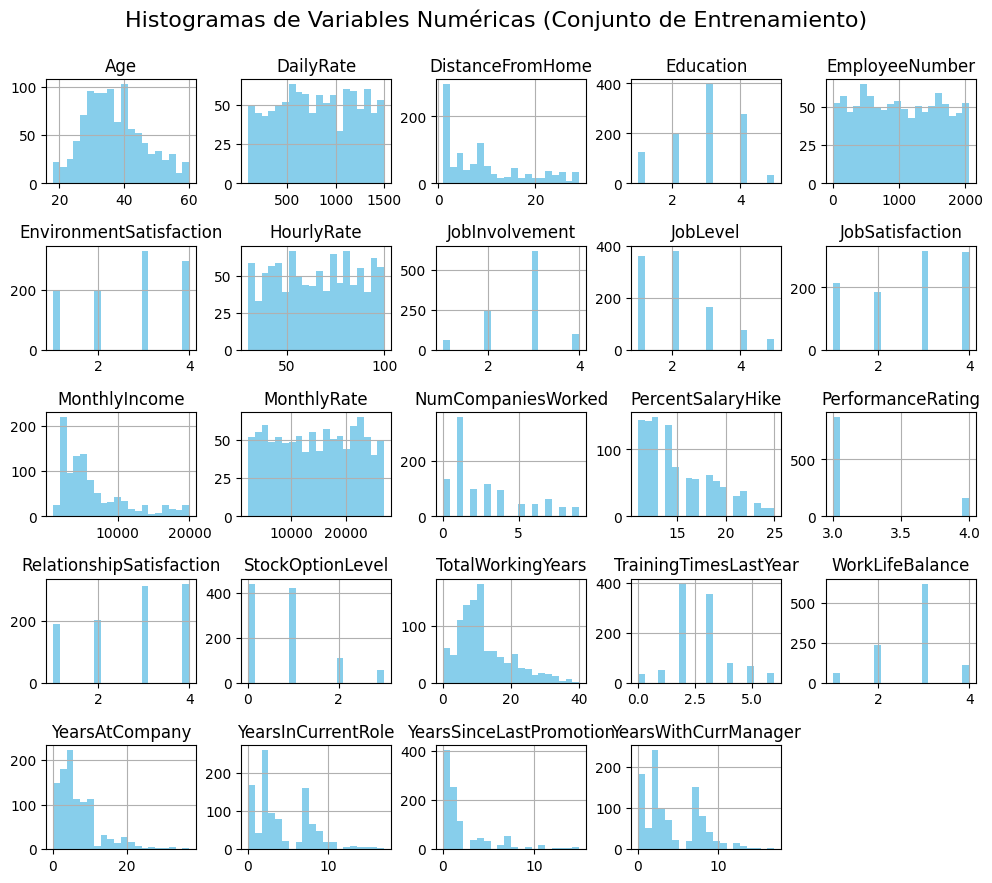

In [118]:
# Obtener histogramas de las variables numéricas
variables_numericas_entrenamiento.hist(bins=20, figsize=(12, 10), color='skyblue')
plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.suptitle('Histogramas de Variables Numéricas (Conjunto de Entrenamiento)', y=0.95, fontsize=16)
plt.show()

## a) Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?

Aplicare transformación cuadratica.

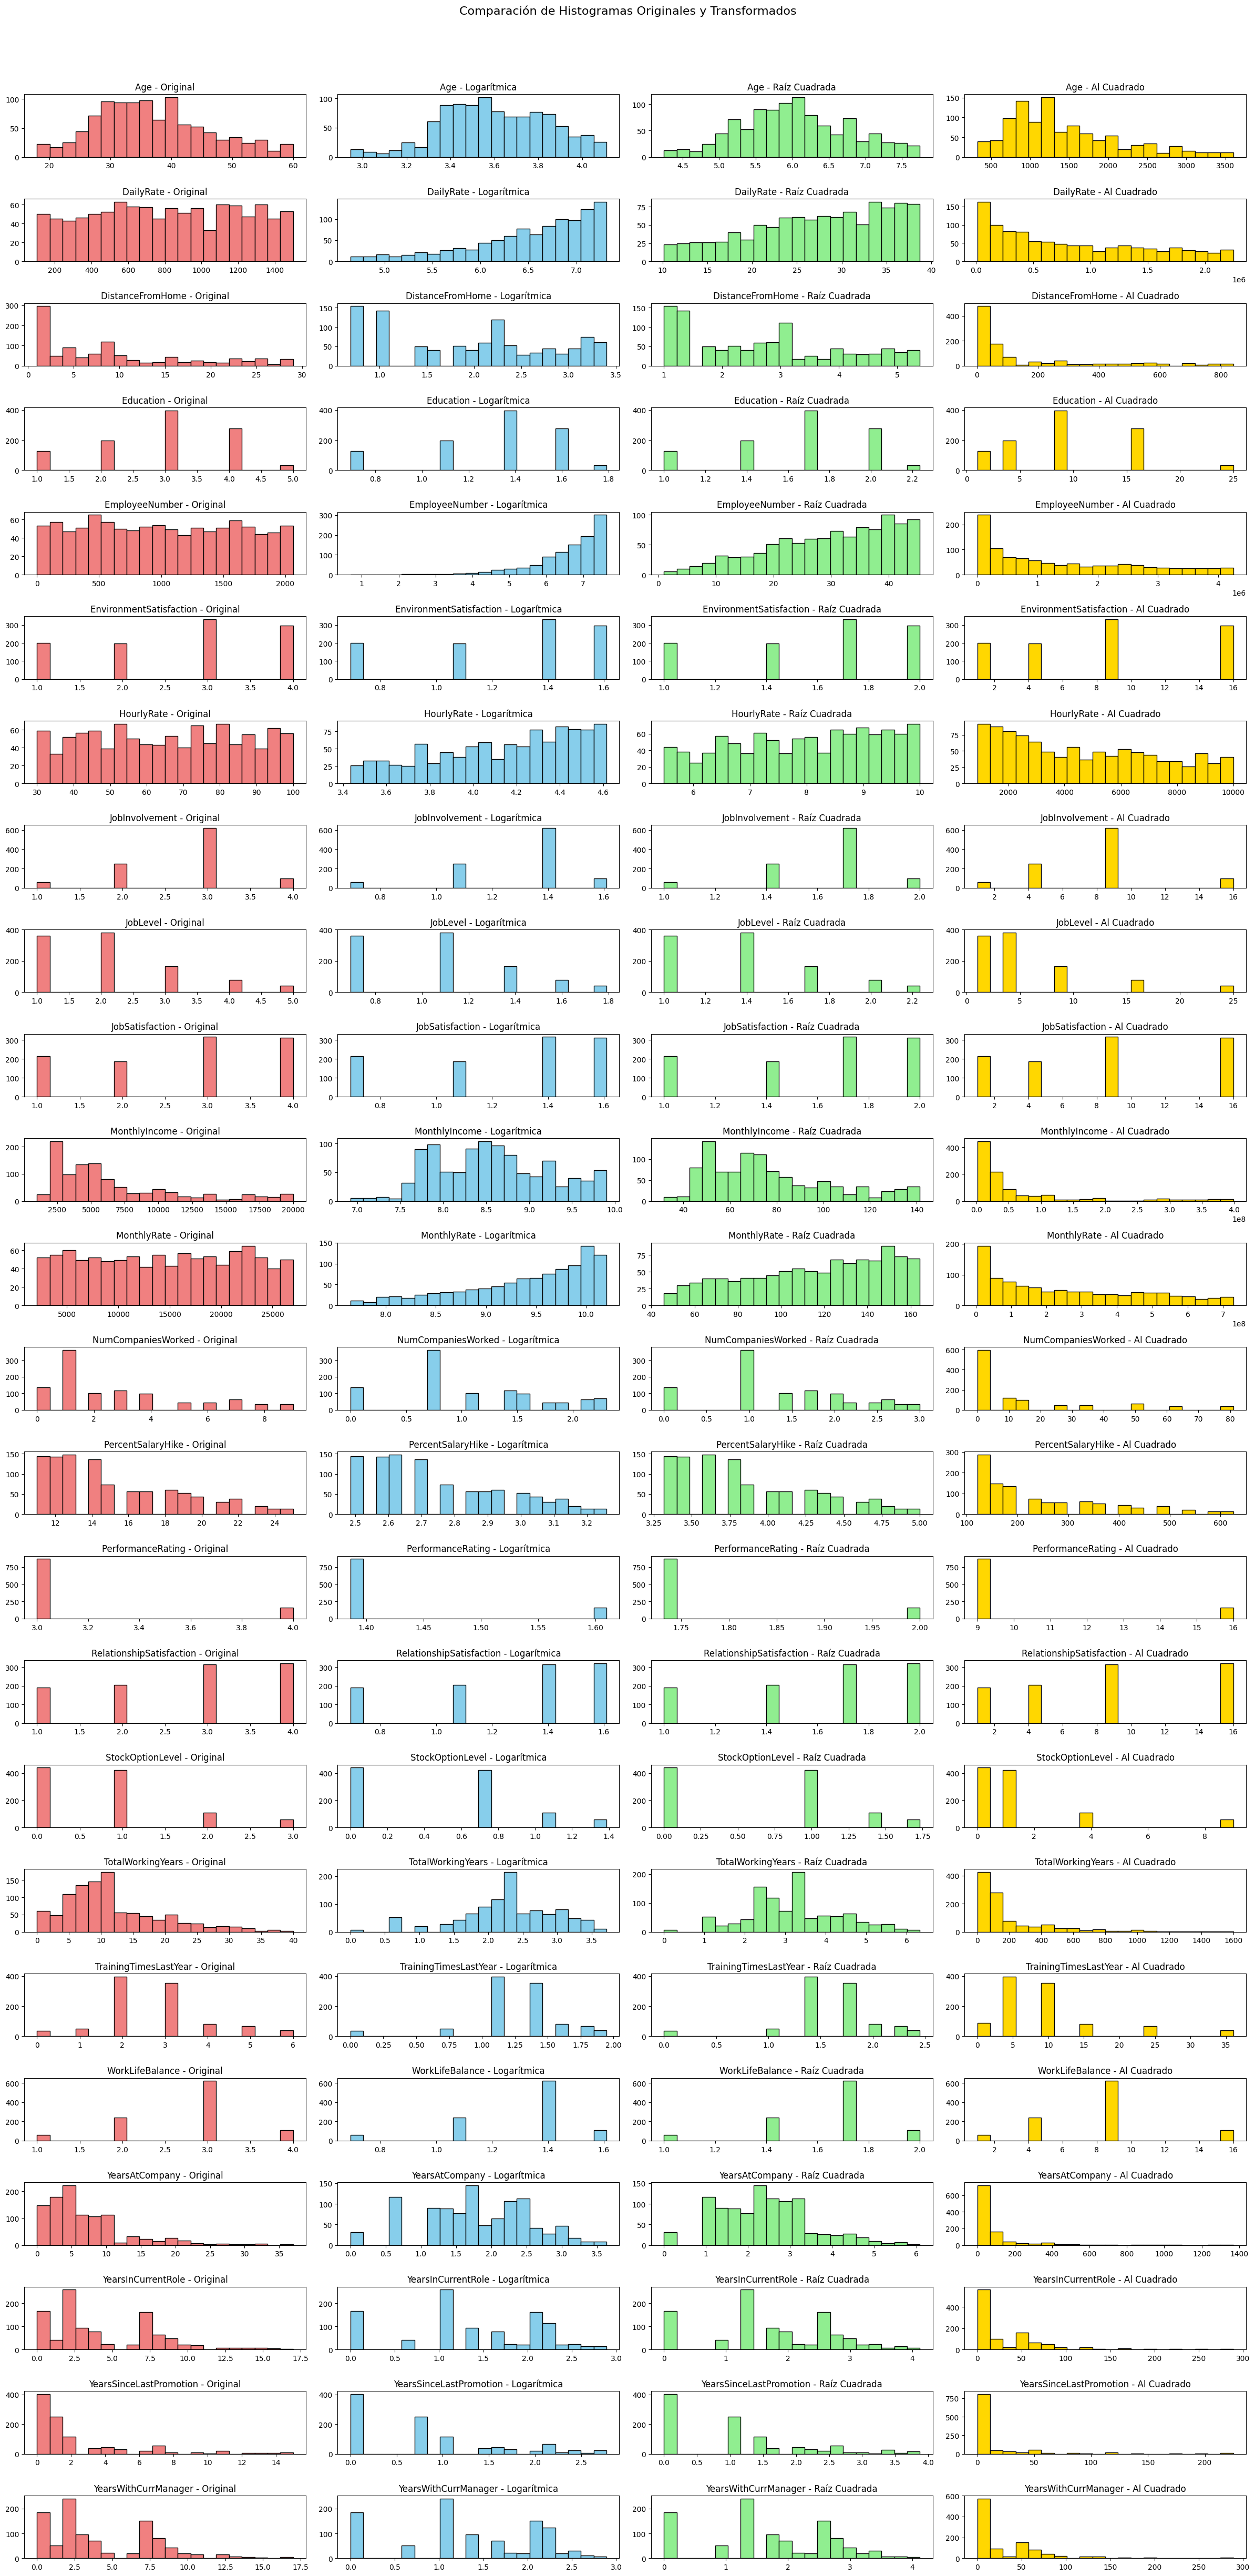

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Obtener histogramas de las variables originales y transformadas en una matriz (Columna Izquierda)
fig, axes = plt.subplots(nrows=len(variables_numericas_entrenamiento.columns), ncols=4, figsize=(24, 2*len(variables_numericas_entrenamiento.columns)))
fig.suptitle('Comparación de Histogramas Originales y Transformados', y=1.02, fontsize=16)

# Ajustar el espacio vertical y horizontal entre los subgráficos
plt.subplots_adjust(hspace=0.6, wspace=0.3)

# Iterar sobre las variables originales y trazar los histogramas en la columna izquierda
for i, column in enumerate(variables_numericas_entrenamiento.columns):
    # Original
    axes[i, 0].hist(variables_numericas_entrenamiento[column], bins=20, color='lightcoral', edgecolor='black')
    axes[i, 0].set_title(f'{column} - Original')

    # Transformaciones para variables no ordinales
    if column not in ordinal_variables:
        # Logarítmica
        transformed_column_log = np.log1p(variables_numericas_entrenamiento[column])
        axes[i, 1].hist(transformed_column_log, bins=20, color='skyblue', edgecolor='black')
        axes[i, 1].set_title(f'{column} - Logarítmica')

        # Raíz Cuadrada
        transformed_column_sqrt = np.sqrt(variables_numericas_entrenamiento[column])
        axes[i, 2].hist(transformed_column_sqrt, bins=20, color='lightgreen', edgecolor='black')
        axes[i, 2].set_title(f'{column} - Raíz Cuadrada')

        # Al Cuadrado
        transformed_column_square = np.square(variables_numericas_entrenamiento[column])
        axes[i, 3].hist(transformed_column_square, bins=20, color='gold', edgecolor='black')
        axes[i, 3].set_title(f'{column} - Al Cuadrado')
    else:
        # Si es una variable ordinal, simplemente dejamos en blanco las columnas de transformaciones
        axes[i, 1].axis('off')
        axes[i, 2].axis('off')
        axes[i, 3].axis('off')

# Eliminar el espacio adicional entre los subgráficos
plt.tight_layout()

plt.show()
plt.show()

## i. Aplica las transformaciones que hayas determinado realizar, evitando el filtrado de información (data-leakage). A estas nuevas variables transformadas llamarlas XtrainT, XvalT y XtestT.

In [120]:
# Importar librerías
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# División de los datos en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    data.drop('Attrition', axis=1),  # Variables de entrada excluyendo "Attrition"
    data['Attrition'],  # Variable de salida "Attrition"
    test_size=0.3,  # 70% para entrenamiento
    stratify=data['Attrition'],  # Conservar la estratificación de "Attrition"
    random_state=42  # Fijar semilla para reproducibilidad
    )

# Dividir el conjunto temporal en validación (50%) y prueba (50%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # 50% para validación y prueba cada uno
    stratify=y_temp,  # Conservar la estratificación
    random_state=42
    )

# Identificar columnas categóricas y numéricas
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['number']).columns

# Crear transformadores para datos categóricos y numéricos
numeric_transformer = PolynomialFeatures(2, include_bias=False)

# Excluir variables ordinales de la transformación categórica
categorical_cols_excluding_ordinal = [col for col in categorical_cols if col not in ordinal_variables]
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Combinar los transformadores en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols_excluding_ordinal)
                  ]
                                )

# Crear un pipeline con el preprocesador y aplicar las transformaciones al conjunto de entrenamiento
poly_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

X_train_poly = poly_pipeline.fit_transform(X_train)

# Aplicar las mismas transformaciones al conjunto de validación y prueba
X_val_poly = poly_pipeline.transform(X_val)
X_test_poly = poly_pipeline.transform(X_test)

# Crear nuevos DataFrames para los conjuntos transformados
XtrainT = pd.DataFrame(X_train_poly, columns=poly_pipeline.named_steps['preprocessor'].get_feature_names_out())
XvalT = pd.DataFrame(X_val_poly, columns=poly_pipeline.named_steps['preprocessor'].get_feature_names_out())
XtestT = pd.DataFrame(X_test_poly, columns=poly_pipeline.named_steps['preprocessor'].get_feature_names_out())

# Mostrar las formas de los conjuntos transformados
print("Formas de los conjuntos transformados:")
print("XtrainT:", XtrainT.shape)
print("XvalT:", XvalT.shape)
print("XtestT:", XtestT.shape)


Formas de los conjuntos transformados:
XtrainT: (1029, 345)
XvalT: (220, 345)
XtestT: (221, 345)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##5) Aplica la transformación LabelEncoder() de sklearn a todas las variables binarias,evitando el filtrado de información.

In [121]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# División de los datos en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    data.drop('Attrition', axis=1),  # Variables de entrada excluyendo "Attrition"
    data['Attrition'],  # Variable de salida "Attrition"
    test_size=0.3,  # 70% para entrenamiento
    stratify=data['Attrition'],  # Conservar la estratificación de "Attrition"
    random_state=42  # Fijar semilla para reproducibilidad
)

# Dividir el conjunto temporal en validación (50%) y prueba (50%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # 50% para validación y prueba cada uno
    stratify=y_temp,  # Conservar la estratificación
    random_state=42
)

# Identificar columnas binarias
binary_cols = X_train.select_dtypes(include=['bool']).columns

# Crear un diccionario para almacenar los encoders de cada columna binaria
label_encoders = {}

# Aplicar LabelEncoder a cada columna binaria en el conjunto de entrenamiento
for col in binary_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le

# Aplicar los mismos LabelEncoders a las columnas binarias en los conjuntos de validación y prueba
for col, le in label_encoders.items():
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])

# Mostrar las formas de los conjuntos resultantes
print("Formas de los conjuntos:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)


Formas de los conjuntos:
X_train: (1029, 32)
X_val: (220, 32)
X_test: (221, 32)


##a) En particular, obtener la distribución de las clases de la variable de salida “Attrition”. Con base a dicha distribución, ¿podemos considerar que tenemos un problema de datos no balanceados?

Se puede observar un problema de desbalance debido a la gran diferencia entre conteo de clases de la variable de salida “Attrition”

<ipython-input-122-90207d5ad2be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=data, palette='viridis')


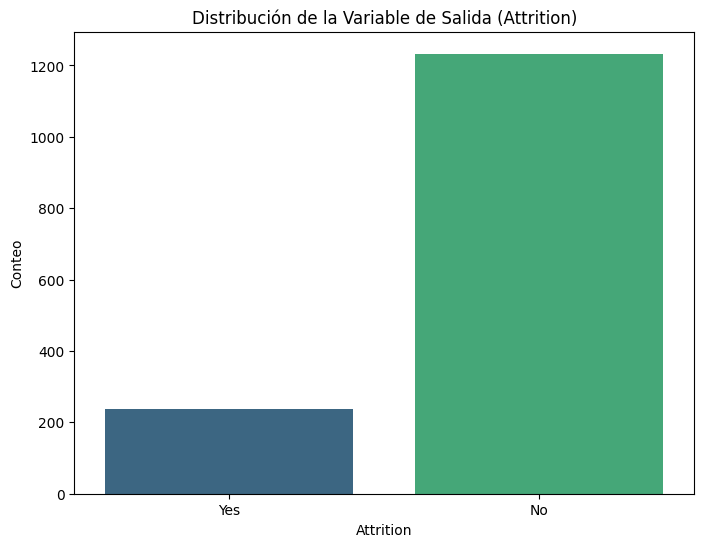

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de clases
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=data, palette='viridis')
plt.title('Distribución de la Variable de Salida (Attrition)')
plt.xlabel('Attrition')
plt.ylabel('Conteo')
plt.show()

##6) Realiza una inspección de las variables ordinales y determina qué transformaciones aplicarles, en caso de aplicar alguna. Justifica la decisión que tomes.

In [123]:
ordinal_variables

[]

Para las variables ordinales que he encontrado en el conjunto de datos, realizaria una normalización para evitar que las escalas afecten los resultados de aprendizaje

##7) Obtener la matriz de correlación de los factores obtenidos hasta el momento. Debes incluir la variable “Attrition”.


In [124]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Suponiendo que "data" es tu conjunto de datos y que ya tienes los factores obtenidos

# Codificar la variable categórica "Attrition"
label_encoder = LabelEncoder()
data['Attrition_encoded'] = label_encoder.fit_transform(data['Attrition'])

# Seleccionar todas las variables numéricas
variables_numericas = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = variables_numericas.corr()

# Mostrar la matriz de correlación
#print(correlation_matrix)

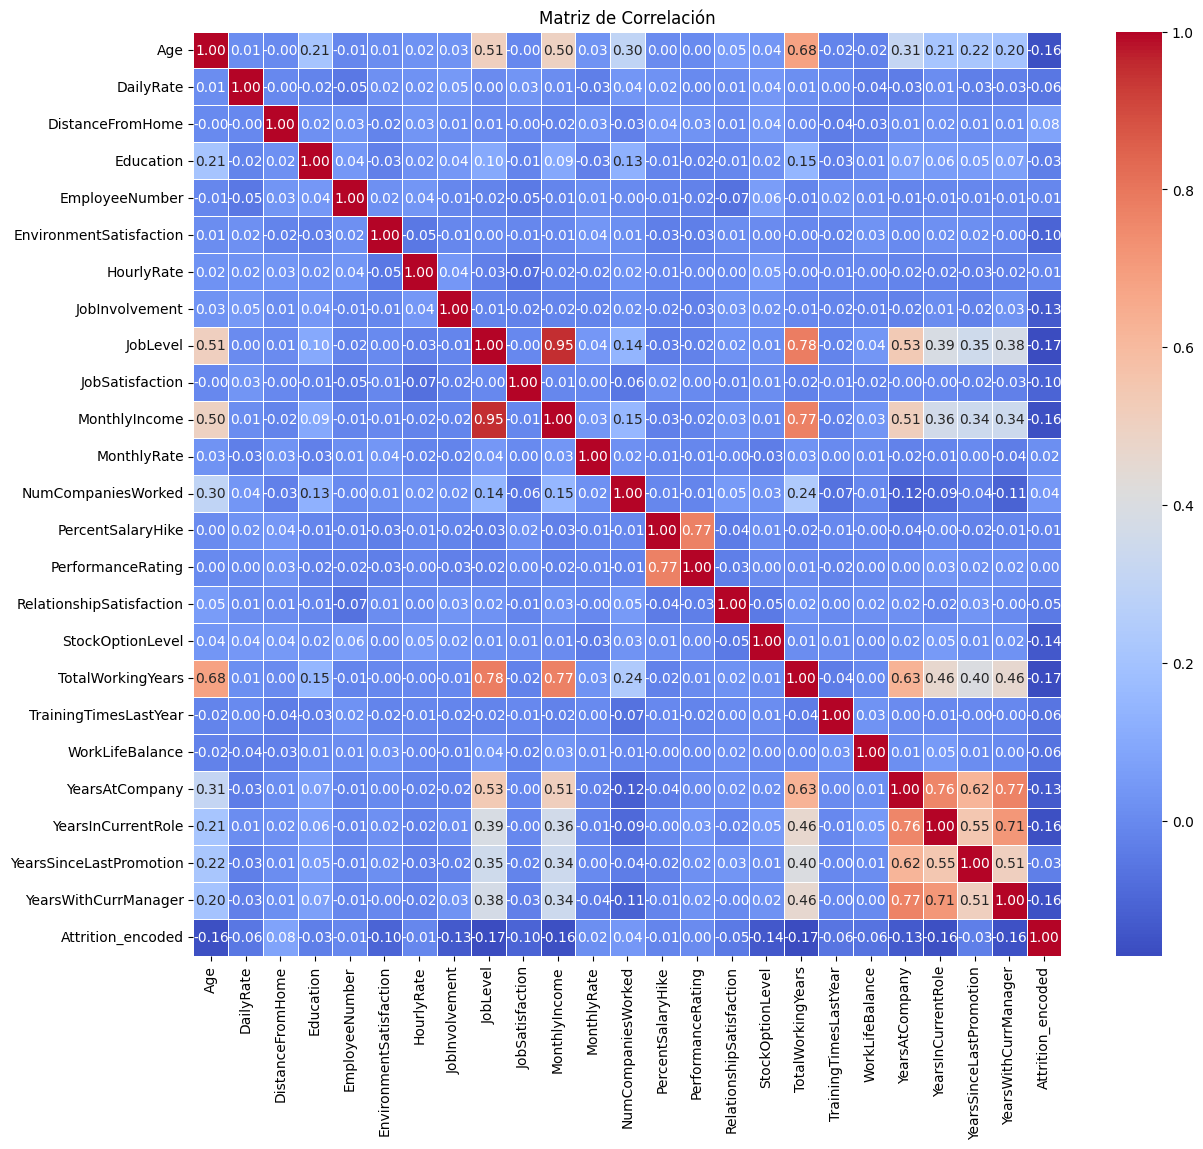

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt


# Configurar el tamaño de la figura
plt.figure(figsize=(14, 12))

# Generar el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()


## a) Indica las correlaciones positivas “fuertes” entre pares de factores que encuentres dentro de la matriz.


In [126]:
import numpy as np

# Definir umbral para considerar una correlación como fuerte
umbral_fuerte = 0.7

# Encontrar índices donde la matriz de correlación sea mayor que el umbral
filas, columnas = np.where(correlation_matrix > umbral_fuerte)

# Crear una lista de pares de factores con correlaciones positivas fuertes
correlaciones_fuertes = []

# Iterar sobre los índices encontrados y agregar los pares de factores con correlaciones positivas fuertes
for i, j in zip(filas, columnas):
    if i != j:
        correlaciones_fuertes.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Mostrar las correlaciones positivas fuertes
print("Correlaciones positivas fuertes entre pares de factores:")
for factor1, factor2, correlacion in correlaciones_fuertes:
    print(f"{factor1} - {factor2}: {correlacion}")



Correlaciones positivas fuertes entre pares de factores:
JobLevel - MonthlyIncome: 0.9502999134798473
JobLevel - TotalWorkingYears: 0.7822078045362748
MonthlyIncome - JobLevel: 0.9502999134798473
MonthlyIncome - TotalWorkingYears: 0.7728932462543574
PercentSalaryHike - PerformanceRating: 0.7735499964012664
PerformanceRating - PercentSalaryHike: 0.7735499964012664
TotalWorkingYears - JobLevel: 0.7822078045362748
TotalWorkingYears - MonthlyIncome: 0.7728932462543574
YearsAtCompany - YearsInCurrentRole: 0.7587537366134619
YearsAtCompany - YearsWithCurrManager: 0.7692124251007031
YearsInCurrentRole - YearsAtCompany: 0.7587537366134619
YearsInCurrentRole - YearsWithCurrManager: 0.7143647616385931
YearsWithCurrManager - YearsAtCompany: 0.7692124251007031
YearsWithCurrManager - YearsInCurrentRole: 0.7143647616385931


## b) Indica las correlaciones negativas “fuertes” entre pares de factores que encuentres dentro de la matriz.

In [127]:
import numpy as np

# Definir umbral para considerar una correlación como fuerte
umbral_fuerte_negativo = -0.7

# Encontrar índices donde la matriz de correlación sea menor que el umbral
filas_neg, columnas_neg = np.where(correlation_matrix <= umbral_fuerte_negativo)

# Crear una lista de pares de factores con correlaciones negativas fuertes
correlaciones_fuertes_negativas = []

# Iterar sobre los índices encontrados y agregar los pares de factores con correlaciones negativas fuertes
for i, j in zip(filas_neg, columnas_neg):
    if i != j:
        correlaciones_fuertes_negativas.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Verificar si se encontraron correlaciones negativas fuertes
if len(correlaciones_fuertes_negativas) > 0:
    # Mostrar las correlaciones negativas fuertes
    print("Correlaciones negativas fuertes entre pares de factores:")
    for factor1, factor2, correlacion in correlaciones_fuertes_negativas:
        print(f"{factor1} - {factor2}: {correlacion}")
else:
    print("No se encontraron correlaciones negativas fuertes entre pares de factores.")


No se encontraron correlaciones negativas fuertes entre pares de factores.


## 8) Aplica la transformación get_dummies() de Pandas a las variables nominales, evitando el filtrado de información y usando el argumento “drop_first” para generar “k-1” variables “dummies”, de las “k” que cada variable.

In [128]:
import pandas as pd

# Obtener variables nominales (no numéricas)
variables_nominales = X_train.select_dtypes(exclude=['int', 'float']).columns

# Aplicar get_dummies a las variables nominales en X_train
X_train = pd.get_dummies(X_train, columns=variables_nominales, drop_first=True)

# Aplicar get_dummies a las variables nominales en X_val
X_val = pd.get_dummies(X_val, columns=variables_nominales, drop_first=True)

# Aplicar get_dummies a las variables nominales en X_test
X_test = pd.get_dummies(X_test, columns=variables_nominales, drop_first=True)

## 9) Usa la instrucción XtrainT.head().T, para desplegar los primeros registros de tus datos de entrenamiento con todas las transformaciones realizadas hasta ahora. NOTA: Hasta aquí, los nombres de tus variables deben seguir siendo los mismos: XtrainT, XvalT, XtestT, ytrainT, yvalT, ytestT.

In [129]:
# Mostrar los primeros registros de los datos de entrenamiento transpuestos
print(X_train.head().T)

                                   853    435    587   1170   159 
Age                                  19     33     52    27     34
DailyRate                           645   1277   1325   591    303
DistanceFromHome                      9     15     11     2      2
Education                             2      1      4     3      4
EmployeeNumber                     1193    582    813  1648    216
EnvironmentSatisfaction               3      2      4     4      3
HourlyRate                           54     56     82    87     75
JobInvolvement                        3      3      3     3      3
JobLevel                              1      3      2     1      1
JobSatisfaction                       1      3      3     4      3
MonthlyIncome                      2552  13610   3149  2580   2231
MonthlyRate                        7172  24619  21821  6297  11314
NumCompaniesWorked                    1      7      8     2      6
PercentSalaryHike                    25     12     20    13   

In [130]:
# Mostrar las dimensiones de los conjuntos X_train, X_val y X_test
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_val:", X_val.shape)
print("Dimensiones de X_test:", X_test.shape)

Dimensiones de X_train: (1029, 45)
Dimensiones de X_val: (220, 45)
Dimensiones de X_test: (221, 45)


## 10) Se pueden analizar una buena cantidad de factores para buscar relaciones entre los factores y la variable de salida “Attrition”, la decisión de dejar un puesto. A a manera de ejemplos, veamos solo algunas de dichas relaciones gráficamente y que pueden aportar información al problema que enfrentamos.

a) Las variables “Age” y “Attrition”.


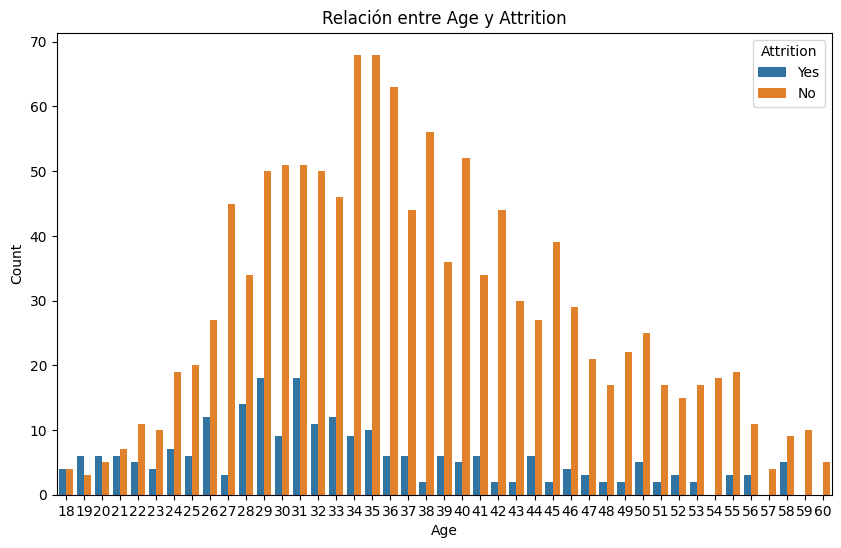

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para la relación entre Age y Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Attrition', data=data)
plt.title('Relación entre Age y Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

b) Las variables “Department” y “Attrition”.


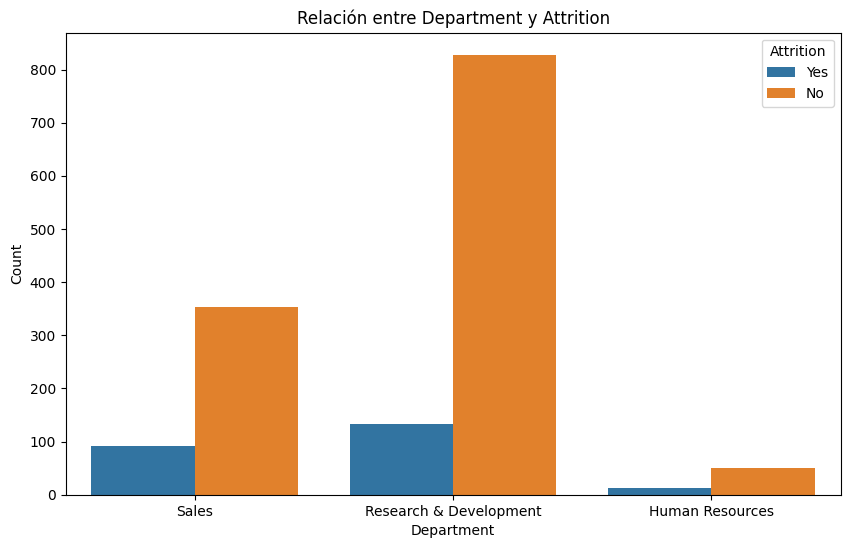

In [132]:
# Gráfico de barras para la relación entre Department y Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Relación entre Department y Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

c) Las variables “Gender” y “Attrition”.


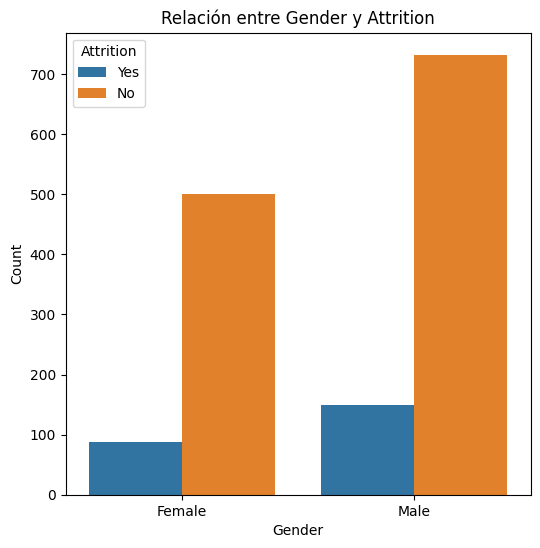

In [133]:
# Gráfico de barras para la relación entre Gender y Attrition
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Relación entre Gender y Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

d) Incluye alguna otra relación o relaciones que consideres relevantes.


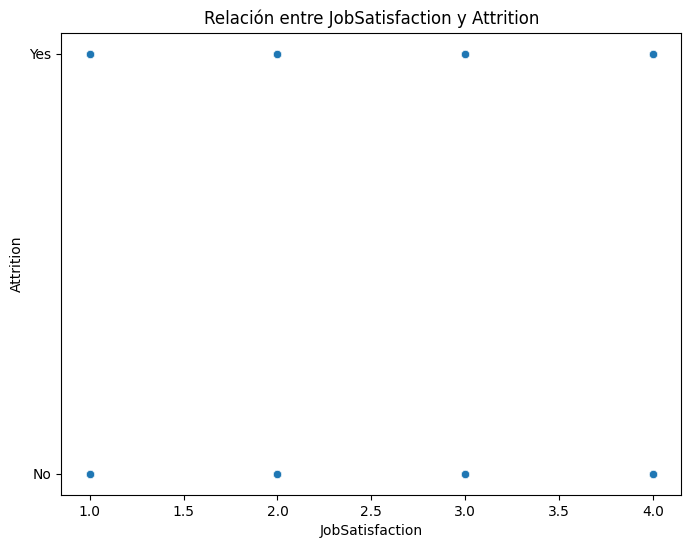

In [134]:
# Gráfico de dispersión para la relación entre JobSatisfaction y Attrition
plt.figure(figsize=(8, 6))
sns.scatterplot(x='JobSatisfaction', y='Attrition', data=data)
plt.title('Relación entre JobSatisfaction y Attrition')
plt.xlabel('JobSatisfaction')
plt.ylabel('Attrition')
plt.show()

e) Con base a los gráficos obtenidos incluye tus conclusiones al respecto


En el gráfico de barras para la relación entre "Age" y "Attrition", parece haber una tendencia de mayor tasa de atrición en empleados más jóvenes, disminuyendo con la edad.
En el gráfico de barras para la relación entre "Department" y "Attrition", parece haber diferencias en las tasas de atrición entre diferentes departamentos.
En el gráfico de barras para la relación entre "Gender" y "Attrition", no parece haber una diferencia significativa en las tasas de atrición entre géneros.
En el gráfico de dispersión para la relación entre "JobSatisfaction" y "Attrition", parece haber una tendencia de mayor atrición en empleados con niveles de satisfacción laboral más bajos

11) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no
sobreentrenado de regresión logística usando la función LogisticRegression() de sklearn.


a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento
y Validación.


b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte
dado por la función classification_report() de sklearn.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=20000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Predecir las etiquetas para los conjuntos de entrenamiento y validación
y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)

# Calcular la exactitud de los conjuntos de entrenamiento y validación
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Desplegar los valores de exactitud
print("Exactitud en el conjunto de entrenamiento:", train_accuracy)
print("Exactitud en el conjunto de validación:", val_accuracy)

# Desplegar la matriz de confusión y el reporte de clasificación para el conjunto de validación
print("Matriz de Confusión (Validación):")
print(confusion_matrix(y_val, y_val_pred))
print("\nReporte de Clasificación (Validación):")
print(classification_report(y_val, y_val_pred))













Exactitud en el conjunto de entrenamiento: 0.891156462585034
Exactitud en el conjunto de validación: 0.8909090909090909
Matriz de Confusión (Validación):
[[183   2]
 [ 22  13]]

Reporte de Clasificación (Validación):
              precision    recall  f1-score   support

          No       0.89      0.99      0.94       185
         Yes       0.87      0.37      0.52        35

    accuracy                           0.89       220
   macro avg       0.88      0.68      0.73       220
weighted avg       0.89      0.89      0.87       220



# c) ¿Podemos decir que el modelo está subentrenado (underfitting) o sobreentrenado (overfitting)? Justifica tu respuesta.
#Analizando la diferencia entre la exactitud en los conjuntos de entrenamiento y validación, podemos inferir que el modelo esta adecuadamente ajustado.


# d) ¿Consideras que tenemos un problema desbalanceado? Justifica tu respuesta.
# Es posible que el problema este desbalanceado debido a la diferencia de valores en la variable de salida

# e) Interpreta el valor numérico de la "precision" de la clase positiva.
# En el contexto de este problema, la clase positiva puedeser la atrición de empleados.
#Una alta precisión significa que la mayoría de las predicciones de atrición son correctas,
#lo que significa que el modelo hace pocas predicciones falsas positivas de atrición.

# f) Interpreta el valor numérico del "recall" de la clase positiva.
# El modelo identifica correctamente la
#mayoría de los casos de atrición real.

# g) Con base al contexto de este problema, de rotación de personal, ¿cuál de las métricas, "precision" o "recall"
#consideras que es más importante disminuir su valor? Es decir, si no se puede disminuir el valor de ambos al mismo
#tiempo y debieras sacrificar uno de ellos, ¿cuál sería el que buscarías que fuera más cercano a cero? Justifica tu
#respuesta con base al contexto del problema.


# En el contexto de rotación de personal, es importante minimizar el número de falsos negativos, es decir,
#aquellos casos en los que el modelo predice que un empleado no dejará la empresa cuando en realidad lo hace.
#Esto significa que el recall (recall) es más crítico que la precisión (precision), ya que un recall bajo indica
#que el modelo está perdiendo casos importantes de atrición que podrían haber sido identificados. Por lo tanto,
#si tuviéramos que sacrificar una métrica, sería la precisión, ya que es más aceptable predecir erróneamente que
#un empleado dejará la empresa cuando en realidad no lo hará, que no predecir que un empleado dejará la empresa
#cuando realmente lo hará.

##12) Utiliza los conjuntos de entrenamiento y validación para generar el mejor modelo no sobreentrenado de los vecinos más cercanos kNN, usando la función KNeighborsClassifier() de sklearn.
##a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
##b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inicializar el clasificador kNN
knn = KNeighborsClassifier()

# Entrenar el modelo en los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir las etiquetas de los datos de entrenamiento y validación
y_train_pred = knn.predict(X_train)
y_val_pred = knn.predict(X_val)

# Calcular la exactitud (accuracy) en los conjuntos de entrenamiento y validación
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)

print("Exactitud (Accuracy) en el conjunto de entrenamiento:", accuracy_train)
print("Exactitud (Accuracy) en el conjunto de validación:", accuracy_val)

# Mostrar la matriz de confusión y el reporte de clasificación en el conjunto de validación
print("Matriz de Confusión en el conjunto de validación:")
print(confusion_matrix(y_val, y_val_pred))

print("\nReporte de Clasificación en el conjunto de validación:")
print(classification_report(y_val, y_val_pred))

Exactitud (Accuracy) en el conjunto de entrenamiento: 0.8658892128279884
Exactitud (Accuracy) en el conjunto de validación: 0.8
Matriz de Confusión en el conjunto de validación:
[[174  11]
 [ 33   2]]

Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

          No       0.84      0.94      0.89       185
         Yes       0.15      0.06      0.08        35

    accuracy                           0.80       220
   macro avg       0.50      0.50      0.49       220
weighted avg       0.73      0.80      0.76       220



c) Con base a estos resultados, ¿podemos decir que el modelo está subentrenado
(underfitting)? ¿o sobreentrenado (overfitting)? Justifica tu respuesta.

Basandonos en los resultados de exactitud, el modelo parece indicar un sobreajuste, pues el conjunto de entrenamiento es un poco mayor al conjunto de validación.


d) Interpreta el valor numérico de la “precision” de la clase positiva.

El modelo presenta una baja presición al predecir resultados de atrition, y una alta precision para los resultados de No atrition, lo cual puede significar que el modelo puede predecir que el empleado si rotara cuando en realidad no lo hará en una gran cantidad de veces.

e) Interpreta el valor numérico del “recall” de la clase positiva.

Existe una gran probabilidad de que el modelo no haya encontrado la mayoria de casos positivos debido a el valor tan bajo


Compara los resultados con los del modelo de Regresión Logística y escribe tus
conclusiones.

El modelo de regresión logistica tiene mejor performance al entregar valores mas acertados basandonos en el reporte de clasficiacion y la exactitud de ambos modelos.

PARTE 4: Balanceo de Clases


13) Utiliza el argumento “class_weight” de la función LogisticRegression() de sklearn y los
valores de los hiperparámetros que consideres más adecuados para obtener un modelo
no sobreentrenado.


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el modelo de regresión logística con el argumento class_weight
logistic_model = LogisticRegression(max_iter=20000, random_state=42, class_weight='balanced')

# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Predecir las etiquetas para los conjuntos de entrenamiento y validación
y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)

# Calcular la exactitud de los conjuntos de entrenamiento y validación
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Desplegar los valores de exactitud
print("Exactitud en el conjunto de entrenamiento:", train_accuracy)
print("Exactitud en el conjunto de validación:", val_accuracy)

# Desplegar la matriz de confusión y el reporte de clasificación para el conjunto de validación
print("Matriz de Confusión (Validación):")
print(confusion_matrix(y_val, y_val_pred))
print("\nReporte de Clasificación (Validación):")
print(classification_report(y_val, y_val_pred))

Exactitud en el conjunto de entrenamiento: 0.7764820213799806
Exactitud en el conjunto de validación: 0.75
Matriz de Confusión (Validación):
[[143  42]
 [ 13  22]]

Reporte de Clasificación (Validación):
              precision    recall  f1-score   support

          No       0.92      0.77      0.84       185
         Yes       0.34      0.63      0.44        35

    accuracy                           0.75       220
   macro avg       0.63      0.70      0.64       220
weighted avg       0.83      0.75      0.78       220



a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento
y Validación.


b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte
dado por la función classification_report() de sklearn.


c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.

Modelo 1 (Regresión Logística sin ajuste de hiperparámetros):
Precisiones más altas para ambas clases en comparación con los otros modelos.
Sin embargo, el recall para la clase "Yes" es bajo, lo que indica que el modelo tiene dificultades para identificar correctamente los casos positivos.



Modelo 2 (Regresión Logística con ajuste de hiperparámetros):El modelo parece estar sobreajustado ya que la exactitud en el conjunto de entrenamiento es significativamente mayor que en el conjunto de validación.
Las métricas de precisión y recall son bajas para la clase "Yes", lo que indica un rendimiento deficiente en la identificación de casos positivos.

Modelo 3 (Regresión Logística con ajuste de hiperparámetros y balanceo de clases): El modelo parece estar equilibrado y generaliza bien en el conjunto de validación.
Aunque la exactitud es más baja que en los otros modelos, las métricas de precisión y recall para ambas clases son más equilibradas.

El Modelo 3 podria ser el más adecuado para este problema, ya que tiene un equilibrio entre la precisión y el recall para ambas clases, evitando el sobreajuste y dando un rendimiento aceptable en el conjunto de validación

##14) Utiliza el método SMOTE de la librería “Imbalanced-learn” y los valores de los hiperparámetros que consideres más adecuados para obtener el mejor modelo posible.


## a) Despliega los valores de la exactitud (accuracy) de los conjuntos de Entrenamiento y Validación.
## b) Utiliza los datos de validación para desplegar la matriz de confusión y el reporte dado por la función classification_report() de sklearn.
## c) Compara los resultados con los modelos anteriores y escribe tus conclusiones.

In [138]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Inicializar y entrenar el modelo de regresión logística con los datos balanceados
logistic_model_smote = LogisticRegression(max_iter=5000000, random_state=42)
logistic_model_smote.fit(X_train_resampled, y_train_resampled)

# Predecir las etiquetas para los conjuntos de entrenamiento y validación
y_train_pred_smote = logistic_model_smote.predict(X_train)
y_val_pred_smote = logistic_model_smote.predict(X_val)

# Calcular la exactitud de los conjuntos de entrenamiento y validación
train_accuracy_smote = accuracy_score(y_train, y_train_pred_smote)
val_accuracy_smote = accuracy_score(y_val, y_val_pred_smote)

# Desplegar los valores de exactitud
print("Exactitud en el conjunto de entrenamiento (con SMOTE):", train_accuracy_smote)
print("Exactitud en el conjunto de validación (con SMOTE):", val_accuracy_smote)

# Desplegar la matriz de confusión y el reporte de clasificación para el conjunto de validación
print("Matriz de Confusión en el conjunto de validación (con SMOTE):")
print(confusion_matrix(y_val, y_val_pred_smote))
print("\nReporte de Clasificación en el conjunto de validación (con SMOTE):")
print(classification_report(y_val, y_val_pred_smote))

Exactitud en el conjunto de entrenamiento (con SMOTE): 0.8425655976676385
Exactitud en el conjunto de validación (con SMOTE): 0.8090909090909091
Matriz de Confusión en el conjunto de validación (con SMOTE):
[[164  21]
 [ 21  14]]

Reporte de Clasificación en el conjunto de validación (con SMOTE):
              precision    recall  f1-score   support

          No       0.89      0.89      0.89       185
         Yes       0.40      0.40      0.40        35

    accuracy                           0.81       220
   macro avg       0.64      0.64      0.64       220
weighted avg       0.81      0.81      0.81       220



#En comparación con los modelos anteriores:

#El modelo con SMOTE tiene una exactitud de aproximadamente 0.84 en el conjunto de validación, lo que indica una mejora significativa en comparación con el modelo 3

#La precisión y el recall para la clase Yes han aumentado en comparación con el modelo 3

#El modelo SMOTE muestra un equilibrio entre precision y recall para la clase positiva (Yes), lo que indica que está logrando un buen compromiso entre la capacidad de identificar correctamente los casos positivos y evitar falsos positivos.


In [139]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el modelo BalancedRandomForestClassifier
balanced_rf_model = BalancedRandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
balanced_rf_model.fit(X_train, y_train)

# Predecir las etiquetas para los conjuntos de entrenamiento y validación
y_train_pred = balanced_rf_model.predict(X_train)
y_val_pred = balanced_rf_model.predict(X_val)

# Calcular la exactitud de los conjuntos de entrenamiento y validación
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Desplegar los valores de exactitud
print("Exactitud en el conjunto de entrenamiento:", train_accuracy)
print("Exactitud en el conjunto de validación:", val_accuracy)

# Desplegar la matriz de confusión y el reporte de clasificación para el conjunto de validación
print("Matriz de Confusión (Validación):")
print(confusion_matrix(y_val, y_val_pred))
print("\nReporte de Clasificación (Validación):")
print(classification_report(y_val, y_val_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

Exactitud en el conjunto de entrenamiento: 0.9076773566569485
Exactitud en el conjunto de validación: 0.6909090909090909
Matriz de Confusión (Validación):
[[134  51]
 [ 17  18]]

Reporte de Clasificación (Validación):
              precision    recall  f1-score   support

          No       0.89      0.72      0.80       185
         Yes       0.26      0.51      0.35        35

    accuracy                           0.69       220
   macro avg       0.57      0.62      0.57       220
weighted avg       0.79      0.69      0.73       220



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

Este modelo combinado parece tener un peor desempeño en términos de exactitud en el conjunto de validación y en la capacidad de clasificar correctamente los casos positivos. Aunque la exactitud en el conjunto de entrenamiento es alta, la discrepancia entre la exactitud en el entrenamiento y en la validación sugiere que el modelo puede estar sobreajustando los datos de entrenamiento.

#PARTE 5: La importancia de los factores
##16) Con base al mejor modelo de regresión logística obtenido hasta ahora, utiliza la magnitud
##de los coeficientes como métrica para identificar aquellos factores que se consideran los
##más importantes al problema de rotación de personal.
##a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor
##asociado a cada barra (bin).


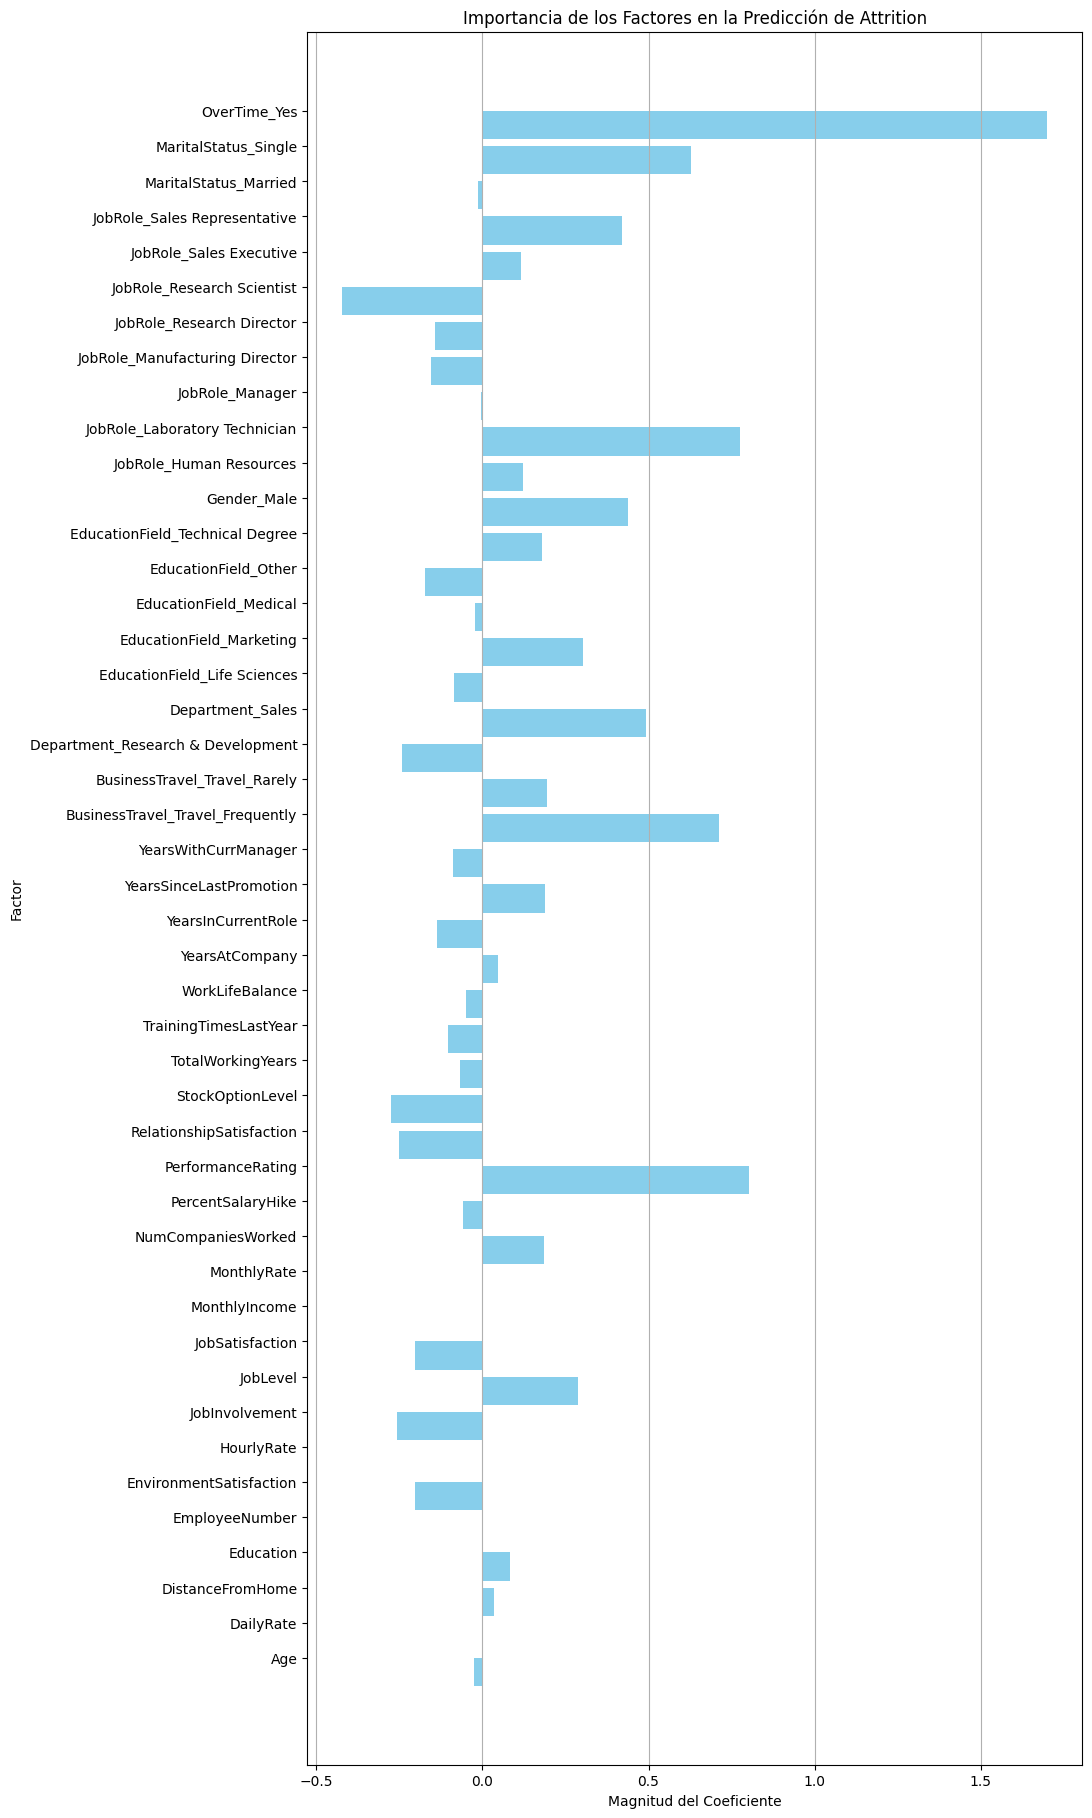

In [140]:
import matplotlib.pyplot as plt

# Obtener los coeficientes del modelo de regresión logística
coefficients = logistic_model.coef_[0]
feature_names = X_train.columns

# Ajustar el ancho de las barras y agregar espacio entre ellas
bar_width = 0.4
indices = range(len(feature_names))
bar_indices = [idx * (bar_width + 0.1) for idx in indices]

# Crear un gráfico de barras de los coeficientes con barras separadas
plt.figure(figsize=(10, len(feature_names) * 0.5))
plt.barh(bar_indices, coefficients, height=bar_width, color='skyblue')
plt.xlabel('Magnitud del Coeficiente')
plt.ylabel('Factor')
plt.title('Importancia de los Factores en la Predicción de Attrition')

# Añadir etiquetas a los ejes x e y
plt.yticks([idx + bar_width / 2 for idx in bar_indices], feature_names)
plt.grid(axis='x')

# Mostrar el gráfico
plt.show()

##b) ¿Cuáles factores consideras que son los que influyen mayormente a que un
##empleado abandone su trabajo (attrition)?
Overtime_yes, JobRole_LAboratory Technician, BusinessTravel_Travel_Frequently, PerformanceRating

##c) ¿Cuáles factores consideras que son los que influyen mayormente a que un
##empleado no abandone su trabajo (not attrition)?
Department_Research & Development_1, JobRole_Research Scientist, RelationshipSatisfaction, JobSatisfaction, JobInvolvement, EnvironmentSatisfaction

#17) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN, aplica la técnica de permutación de los factores con el método “permutation_importance()” de sklearn, y con la métrica “f1_weighted” del argumento “scoring” para identificar aquellos factores que se consideran los más importantes al problema de rotación de personal.

##a) Generar un gráfico de barras de los coeficientes indicando el nombre de cada factor asociado a cada barra (bin).


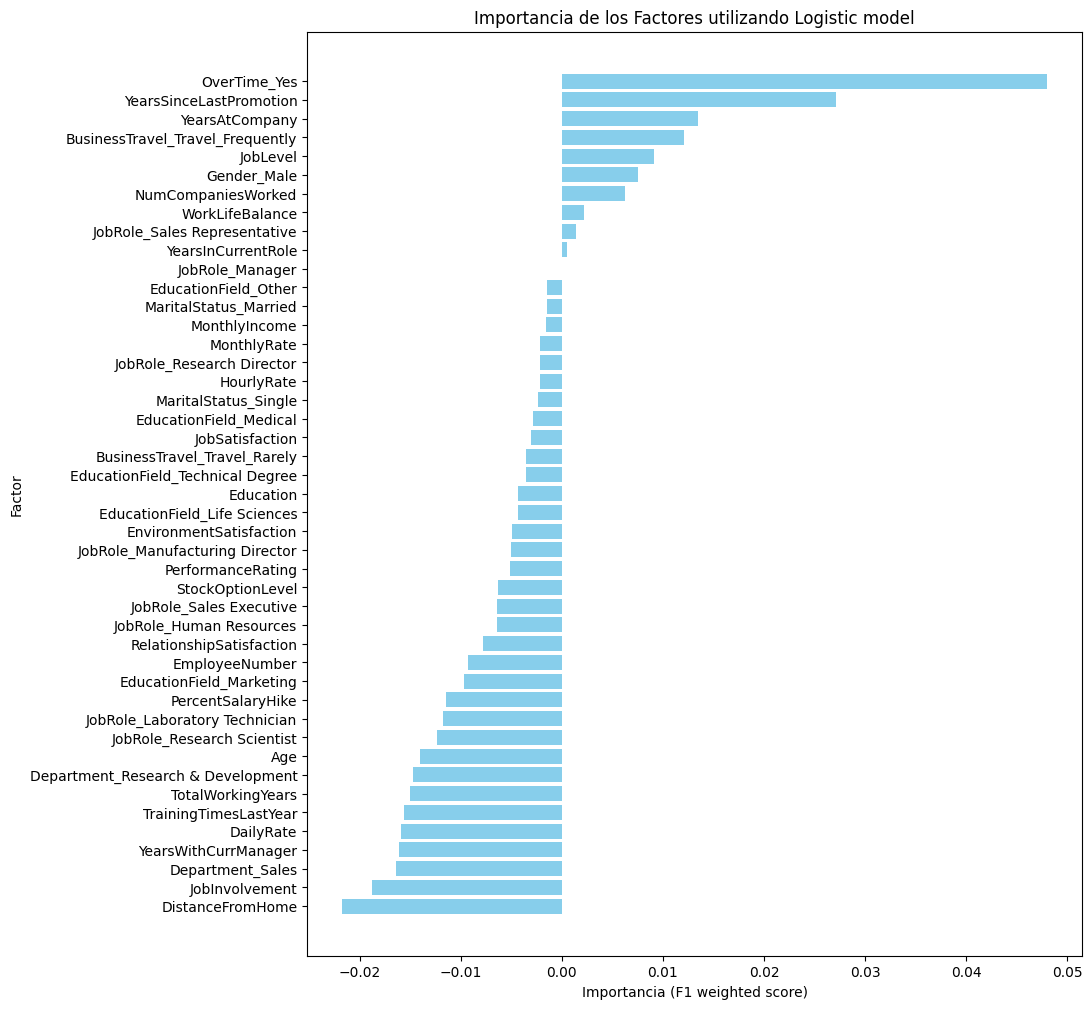

In [141]:
from sklearn.inspection import permutation_importance

# Entrenar el mejor modelo logistic
logistic_model.fit(X_train, y_train)

# Calcular la importancia de los factores utilizando la permutación
perm_importance_logistic = permutation_importance(logistic_model, X_val, y_val, scoring='f1_weighted', n_jobs=-1, random_state=42)

# Obtener los resultados de la permutación
sorted_idx_logistic = perm_importance_logistic.importances_mean.argsort()

# Ajustar el tamaño de la figura para aumentar la altura
plt.figure(figsize=(10, 12))

# Graficar la importancia de los factores
plt.barh(X_train.columns[sorted_idx_logistic], perm_importance_logistic.importances_mean[sorted_idx_logistic], color='skyblue')
plt.xlabel('Importancia (F1 weighted score)')
plt.ylabel('Factor')
plt.title('Importancia de los Factores utilizando Logistic model')
plt.show()

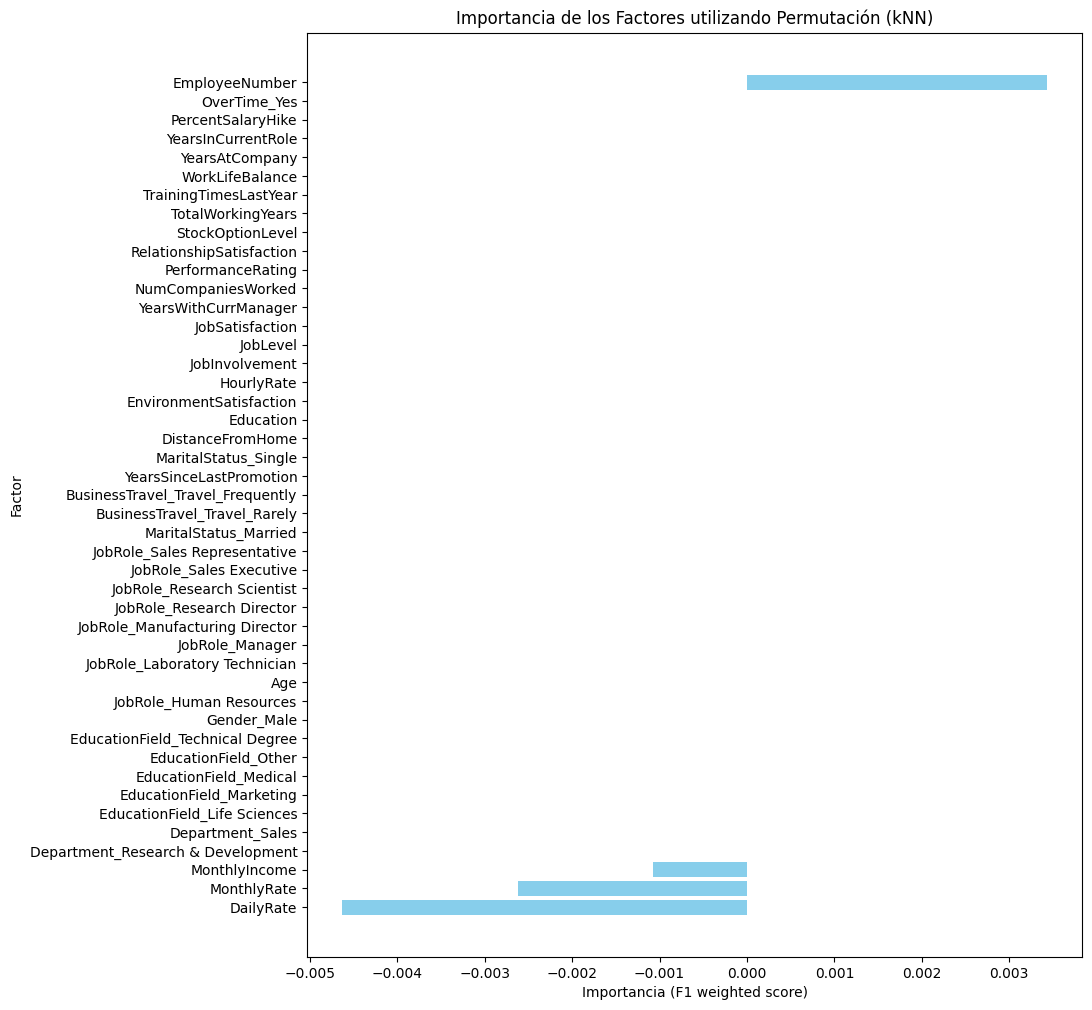

In [142]:
from sklearn.inspection import permutation_importance

# Entrenar el mejor modelo kNN
knn.fit(X_train, y_train)

# Calcular la importancia de los factores utilizando la permutación
perm_importance_knn = permutation_importance(knn, X_val, y_val, scoring='f1_weighted', n_jobs=-1, random_state=42)

# Obtener los resultados de la permutación
sorted_idx_knn = perm_importance_knn.importances_mean.argsort()

# Ajustar el tamaño de la figura para aumentar la altura
plt.figure(figsize=(10, 12))

# Graficar la importancia de los factores
plt.barh(X_train.columns[sorted_idx_knn], perm_importance_knn.importances_mean[sorted_idx_knn], color='skyblue')
plt.xlabel('Importancia (F1 weighted score)')
plt.ylabel('Factor')
plt.title('Importancia de los Factores utilizando Permutación (kNN)')
plt.show()

## b) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado abandone su trabajo (attrition)?

Overtime and distance from home

## c) ¿Cuáles factores consideras que son los que influyen mayormente a que un empleado no abandone su trabajo (not attrition)?

## d) Compara los resultados con el ejercicio anterior e incluye tus comentarios. En particular, comenta cuál método te da los mejores factores que tienen mayor impacto en el problema de rotación de personal.

##18) Con base al mejor modelo que hayas obtenido hasta ahora ente regresión logística y el kNN y de los factores de mayor impacto que encontraste en el inciso anterior, utiliza la clase SelectFromModel de sklearn para reducir la cantidad de factores del problema y volver a entrenar el modelo con los datos de entrenamiento y validación, de manera que el desempeño con esta cantidad de datos reducida sea aproximadamente la obtenida previamente con todos los factores. Recuerda evitar el filtrado de información del conjunto de entrenamiento a los conjuntos de validación y de prueba.

In [143]:
from sklearn.feature_selection import SelectFromModel

# Crear un selector de factores basado en el mejor modelo (regresión logística en este caso)
selector = SelectFromModel(logistic_model)

# Entrenar el selector en el conjunto de entrenamiento
selector.fit(X_train, y_train)

# Seleccionar los factores más importantes
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)

# Entrenar nuevamente el modelo de regresión logística con los factores seleccionados
logistic_model_selected = LogisticRegression(max_iter=20000, random_state=42)
logistic_model_selected.fit(X_train_selected, y_train)

# Calcular la exactitud en el conjunto de validación con los factores seleccionados
val_accuracy_selected = logistic_model_selected.score(X_val_selected, y_val)
print("Exactitud en el conjunto de validación con factores seleccionados:", val_accuracy_selected)

Exactitud en el conjunto de validación con factores seleccionados: 0.8590909090909091


## a) ¿A cuántos factores pudiste reducir el problema? Indica cuántos tenías y a cuántos se redujo, así como el porcentaje de reducción de factores.

In [144]:
# Número de factores originales
num_features_original = X_train.shape[1]

# Número de factores seleccionados
num_features_selected = X_train_selected.shape[1]

# Porcentaje de reducción de factores
reduction_percentage = ((num_features_original - num_features_selected) / num_features_original) * 100

print("Número de factores originales:", num_features_original)
print("Número de factores seleccionados:", num_features_selected)
print("Porcentaje de reducción de factores:", reduction_percentage, "%")

Número de factores originales: 45
Número de factores seleccionados: 15
Porcentaje de reducción de factores: 66.66666666666666 %


## b) Despliega la matriz de confusión y el reporte dado por la función classification_report().

In [145]:
from sklearn.metrics import confusion_matrix, classification_report

# Predecir las etiquetas para el conjunto de validación con factores seleccionados
y_val_pred_selected = logistic_model_selected.predict(X_val_selected)

# Calcular y desplegar la matriz de confusión
conf_matrix_selected = confusion_matrix(y_val, y_val_pred_selected)
print("Matriz de Confusión (Validación con factores seleccionados):")
print(conf_matrix_selected)

# Desplegar el reporte de clasificación
print("\nReporte de Clasificación (Validación con factores seleccionados):")
print(classification_report(y_val, y_val_pred_selected))

Matriz de Confusión (Validación con factores seleccionados):
[[180   5]
 [ 26   9]]

Reporte de Clasificación (Validación con factores seleccionados):
              precision    recall  f1-score   support

          No       0.87      0.97      0.92       185
         Yes       0.64      0.26      0.37        35

    accuracy                           0.86       220
   macro avg       0.76      0.62      0.64       220
weighted avg       0.84      0.86      0.83       220



#PARTE 6: Modelo final y conclusiones
##19) Finalmente, con base a todos los resultados obtenidos hasta ahora, responde a los siguientes incisos para obtener el que consideres el mejor modelo para enfrentar el problema de rotación de personal a partir de los datos históricos iniciales.

#a) Forma un nuevo conjunto de Entrenamiento con los mejores conjuntos de entrenamiento y validación que hayas obtenido hasta ahora.

In [146]:
# Combine the training and validation sets into a new set for training
X_train_train_val = pd.concat([X_train, X_val], ignore_index=True)

# For NumPy arrays, use np.concatenate instead of pd.concat.
y_train_train_val = np.concatenate([y_train, y_val], axis=0)

##b) Selecciona el mejor modelo de aprendizaje automático que hayas obtenido hasta ahora, entre regresión logística y kNN. Explica por qué lo consideras el mejor modelo.

In [147]:
# Train the selected model with the new enhanced training set
final_model = LogisticRegression(class_weight='balanced', max_iter=10000)
final_model.fit(X_train_train_val, y_train_train_val)

# Predicting in the test set
y_test_pred = final_model.predict(X_test)

## c) Entrena el modelo con el nuevo conjunto de entrenamiento aumentado y utiliza el conjunto de Prueba (Test) para obtener el desempeño final de tu mejor modelo.

## i. Despliega la exactitud (accuracy) del conjunto de entrenamiento y del conjunto de Prueba para verificar que no esté sub o sobre entrenado.

In [148]:
# Calculate the accuracy in the training and test set
train_accuracy = final_model.score(X_train_train_val, y_train_train_val)
test_accuracy = final_model.score(X_test, y_test)

# Confusion matrix and classification report on the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.7758206565252201
Test Accuracy: 0.755656108597285


##ii. Despliega la matriz de confusión y el reporte dado por la función classification_report() del conjunto de Prueba.

In [149]:
print("Confusion Matrix on Test Set:")
print(test_conf_matrix)
print("\nClassification Report on Test Set:")
print(test_class_report)

Confusion Matrix on Test Set:
[[141  44]
 [ 10  26]]

Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.93      0.76      0.84       185
         Yes       0.37      0.72      0.49        36

    accuracy                           0.76       221
   macro avg       0.65      0.74      0.66       221
weighted avg       0.84      0.76      0.78       221



## iii. Incluye las conclusiones finales de la actividad. En particular interpreta y explica con base al problema de rotación de personal, los resultados obtenidos para las métricas “precision”, “recall” y “f1-score”.


La precisión para la clase "Yes" (empleados que abandonaron el trabajo) es del 37%. Esto significa que de todas las predicciones positivas de abandono del trabajo realizadas por el modelo, solo el 37% corresponde a casos reales de abandono del trabajo.
La exhaustividad para la clase "Yes" es del 72%. Esto indica que el modelo pudo capturar el 72% de todos los casos reales de abandono del trabajo.
La puntuación F1 para la clase "Yes" es del 49%. Esta puntuación refleja el equilibrio entre precisión y exhaustividad para la predicción de los casos de abandono del trabajo.